# K-means clustering

## import library

In [1269]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [1270]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

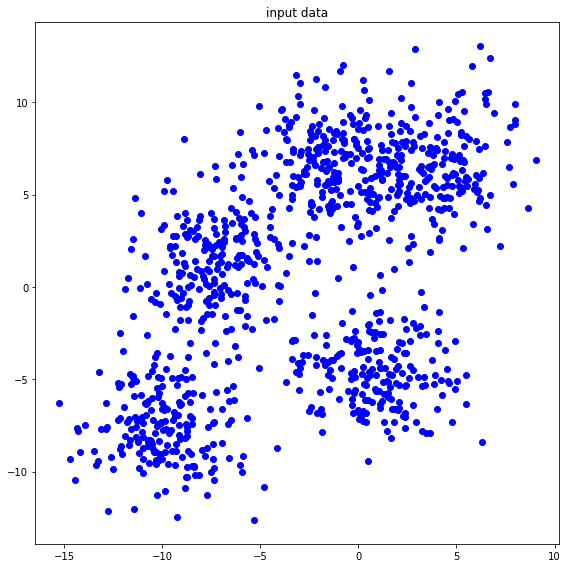

In [1271]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [1317]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #m=2
    #n=#of data
    #(각각의 데이터에 대하여)n개의 distance가 구해짐
    #center: 하나의 point
    # 각각의 point에서 center까지의 거리 구하기(nx1의 벡터가 return됨)
    distance = np.linalg.norm(feature-center, axis=1) # or axis=0
    #distance = distance.reshape(-1,1)
    #np.sqrt(np.sum((feature-center)**2, axis=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [1308]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #x좌표에 대한 centroid, y좌표에 대한 centroid
    #label_feature: 0부터 (k-1)까지의 integer
    #label: k개 중, 하나의 label (특정 label)
    #
    ##centroid = [np.mean(feature[np.where(label_feature==label)[0].tolist()][:,0]),np.mean(feature[np.where(label_feature==label)[0].tolist()][:,1])]
    centroid = np.mean(feature[np.where(label_feature==label)])
    ##centroid = np.array(centroid)#.reshape(1,-1)
    #centroid = feature[label_feature==label].mean(axis=1) #axis=0..?
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [1274]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # if d10(z1, mu0) < d11(z1, mu1), then l=0
    # if d20(z2, mu0) > d21(z2, mu1), then l=1
    #label_feature = np.zeros((np.size(feature, 0),1))
    #for i in range(0, np.size(feature, 0)):
    #    if distance[i,0] < distance[i,1]:
    #        label_feature[i]=0
    #    if distance[i,0] > distance[i,1]:
    #        label_feature[i]=1
    #a = np.array([[1,3,2,4],[0.5,1,2,0.2]])
    '''
    label_feature=[]
    for i in distance:
        label_feature.append(np.argmin(i))
    label_feature = np.array(label_feature)
    '''
    label_feature = np.array([np.argmin(i) for i in distance])
    #label_feature = label_feature.reshape(-1,1)
    #i.index(0)
    #np.argmin(a)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [1275]:
compute_label(compute_distance(feature, a)).shape

#print(feature.shape)

#distance = compute_distance(feature, a)#.reshape(-1,1)
#print(distance.shape)

#l_f = np.array(([2],[1])).reshape(-1,1)
#l_f.shape

#feature.shape, label_feature.shape, label.shape

(1000,)

In [1276]:
number_cluster          = 2
number_iteration        = 100     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [1309]:
loss_iteration_02.shape, centroid_iteration_02.shape, label_feature_02.shape, feature.shape

((100,), (100, 2, 2), (1000,), (1000, 2))

In [1278]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#]

# initialized된 label(=label_feature_02)로, compute centroid -> 모든 cluster의 모든 centroid까지의 distance를 계산 -> 가장 가까운 거리를 사용해서 cluster label을 새롭게 update -> ...
# if centroid가 결정되지 않는 경우, then 이전의 centroid label을 그대로 유지
## 예를 들어, k=3인데 cluter(mu)=2에 assign되는 point가 없을 수 있음 -> 이러한 경우, 해당 cluster의 centroid를 사라지게 만들지 말고, 그 이전의 centroid값을 그대로 사용할 것!
for i in range(0,number_iteration):
    ## centroid_iteration
    centroids  = []
    for label in range(0,number_cluster):
        centroid = compute_centroid(feature, label_feature_02, label)
        centroids.append(centroid)
    centroids = np.vstack(centroids)
    centroid_iteration_02[i] = centroids

    ## distance
    for j in centroid_iteration_02[i]:
        distances = np.zeros((1000,number_cluster))
        for label in range(0, number_cluster):
            distance = compute_distance(feature, j.reshape(1,-1))
            distances[:, label]=distance
            #break
        #break

    ## label_feature        
    label_feature_02 = compute_label(distances)
    
    ## loss_iteration
    losses=[]
    for label in range(0,number_cluster):
        #inner
        loss = np.matmul(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])
        #loss = np.mean(np.sum(np.inner(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])))
        losses.append(loss)

    loss_iteration_02[i] = np.mean(np.sum(losses))

    #loss = np.mean(np.sum(np.inner(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])))
    #    np.sum(np.inner)    
        
        #(1/n)*np.inner(np.transpose(theta), theta)
        #break
    #break
        
        #loss_iteration_02 = loss_iteration_02 + np.squre()
#print(label_feature_02.shape)
# print(centroid_iteration_02.shape)
# print(distance.shape)

#print(centroid_iteration_02)

        #distance = compute_distance(feature, centroid_iteration_02)
        #cluster_label = compute_label(distance)
        #loss_iteration_02 = loss_iteration_02 + np.square(distance[label][cluster_label[label]])
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

c:\Users\cocor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\cocor\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [1279]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#]
number_cluster          = 2
number_iteration        = 100     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))
# initialized된 label(=label_feature_02)로, compute centroid -> 모든 cluster의 모든 centroid까지의 distance를 계산 -> 가장 가까운 거리를 사용해서 cluster label을 새롭게 update -> ...
# if centroid가 결정되지 않는 경우, then 이전의 centroid label을 그대로 유지
## 예를 들어, k=3인데 cluter(mu)=2에 assign되는 point가 없을 수 있음 -> 이러한 경우, 해당 cluster의 centroid를 사라지게 만들지 말고, 그 이전의 centroid값을 그대로 사용할 것!
for i in range(0,number_iteration):
    ## centroid_iteration
    centroids  = []
    for label in range(0,number_cluster):
        centroid = compute_centroid(feature, label_feature_02, label)
        centroids.append(centroid)
    centroids = np.vstack(centroids)
    centroid_iteration_02[i] = centroids


    ## distance
    for j in centroid_iteration_02[i]:
        distances = np.zeros((1000,number_cluster))
        for label in range(0, number_cluster):
            distance = compute_distance(feature, j.reshape(1,-1))
            distances[:, label]=distance
            #break
        #break
    print(distances)
    
    ## label_feature        
    label_feature_02 = compute_label(distances)
    
    ## loss_iteration
    losses=[]
    for label in range(0,number_cluster):
        #inner
        loss = np.matmul(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])
        #loss = np.mean(np.sum(np.inner(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])))
        losses.append(loss)

    loss_iteration_02[i] = np.mean(np.sum(losses))

    #loss = np.mean(np.sum(np.inner(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])))
    #    np.sum(np.inner)    
        
        #(1/n)*np.inner(np.transpose(theta), theta)
        #break
    #break
        
        #loss_iteration_02 = loss_iteration_02 + np.squre()
#print(label_feature_02.shape)
# print(centroid_iteration_02.shape)
# print(distance.shape)

#print(centroid_iteration_02)

        #distance = compute_distance(feature, centroid_iteration_02)
        #cluster_label = compute_label(distance)
        #loss_iteration_02 = loss_iteration_02 + np.square(distance[label][cluster_label[label]])
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++


[[ 5.14183298  5.14183298]
 [ 3.95992179  3.95992179]
 [ 7.13758529  7.13758529]
 ...
 [13.14001572 13.14001572]
 [ 4.98201069  4.98201069]
 [ 8.21908958  8.21908958]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [

In [1280]:
centroids

array([[-2.83738758,  0.51777058],
       [        nan,         nan]])

In [1281]:
for label in range(0,number_cluster):
    print(feature[np.where(label_feature_02==label)])
    break

[[-2.78158782  6.13851704]
 [-5.79072687  3.00770345]
 [-8.85288476  3.99889271]
 ...
 [ 8.01075285  9.06955099]
 [ 1.12859575 -2.53389057]
 [ 0.03723381  8.87194034]]


In [1282]:
distance = compute_distance(feature, a)#.reshape(-1,1)
print(distance.shape)
print(feature.shape, a.shape)

(1000,)
(1000, 2) (1, 2)


## the number of clusters $K = 4$

In [1283]:
number_cluster          = 4
number_iteration        = 2     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [1284]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(0,number_iteration):
    ## centroid_iteration
    centroids  = []
    for label in range(0,number_cluster):
        centroid = compute_centroid(feature, label_feature_04, label)
        centroids.append(centroid)
    centroids = np.vstack(centroids)
    centroid_iteration_04[i] = centroids

    ## distance
    for j in centroid_iteration_04[i]:
        distances = np.zeros((1000,number_cluster))
        for label in range(0, number_cluster):
            distance = compute_distance(feature, j.reshape(1,-1))
            distances[:, label]=distance
            #break
        #break

    ## label_feature        
    label_feature_04 = compute_label(distances)
    
    ## loss_iteration
    losses=[]
    for label in range(0,number_cluster):
        #inner
        loss = np.matmul(np.transpose(feature[np.where(label_feature_04==label)]-centroid_iteration_04[i][label]), feature[np.where(label_feature_04==label)]-centroid_iteration_04[i][label])
        #loss = np.mean(np.sum(np.inner(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])))
        losses.append(loss)
    loss_iteration_04[i] = np.mean(np.sum(losses))

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [1285]:
number_cluster          = 8
number_iteration        = 2     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [1286]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(0,number_iteration):
    ## centroid_iteration
    centroids  = []
    for label in range(0,number_cluster):
        centroid = compute_centroid(feature, label_feature_08, label)
        centroids.append(centroid)
    centroids = np.vstack(centroids)
    centroid_iteration_08[i] = centroids

    ## distance
    for j in centroid_iteration_08[i]:
        distances = np.zeros((1000,number_cluster))
        for label in range(0, number_cluster):
            distance = compute_distance(feature, j.reshape(1,-1))
            distances[:, label]=distance
            #break
        #break

    ## label_feature        
    label_feature_08 = compute_label(distances)
    
    ## loss_iteration
    losses=[]
    for label in range(0,number_cluster):
        #inner
        loss = np.matmul(np.transpose(feature[np.where(label_feature_08==label)]-centroid_iteration_08[i][label]), feature[np.where(label_feature_08==label)]-centroid_iteration_08[i][label])
        #loss = np.mean(np.sum(np.inner(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])))
        losses.append(loss)
    loss_iteration_08[i] = np.mean(np.sum(losses))


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [1287]:
number_cluster          = 16
number_iteration        = 2     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [1288]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(0,number_iteration):
    ## centroid_iteration
    centroids  = []
    for label in range(0,number_cluster):
        centroid = compute_centroid(feature, label_feature_16, label)
        centroids.append(centroid)
    centroids = np.vstack(centroids)
    centroid_iteration_16[i] = centroids

    ## distance
    for j in centroid_iteration_16[i]:
        distances = np.zeros((1000,number_cluster))
        for label in range(0, number_cluster):
            distance = compute_distance(feature, j.reshape(1,-1))
            distances[:, label]=distance
            #break
        #break

    ## label_feature        
    label_feature_16 = compute_label(distances)
    
    ## loss_iteration
    losses=[]
    for label in range(0,number_cluster):
        #inner
        loss = np.matmul(np.transpose(feature[np.where(label_feature_16==label)]-centroid_iteration_16[i][label]), feature[np.where(label_feature_16==label)]-centroid_iteration_16[i][label])
        #loss = np.mean(np.sum(np.inner(np.transpose(feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label]), feature[np.where(label_feature_02==label)]-centroid_iteration_02[i][label])))
        losses.append(loss)
    loss_iteration_16[i] = np.mean(np.sum(losses))

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [1289]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [1290]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [1291]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [1292]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [1293]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [1294]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [1295]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [1296]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()
    #loss가 수렴할때까지 optimization 수행해야함(즉, 더 이상 cluster label에 대한 변화가 생기지 않을때까지)

In [1297]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #centroid_iteration에 저장된 걸 사용해서, 시작부터 끝까지 centroid가 어떻게 이동하는지 표시하기(cluster에 따라서 다른 색 사용, 시작은 파란 원, 끝은 빨간 사각형)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [1298]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [1299]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [1300]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [1301]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #각각의 point에 대해서, cluster label을 각각의 색으로 표현할 것
    number_cluter =2
    
    #for label in range(0, number_cluster):
    #    plt.scatter(feature[np.where(label_feature_02==label)][:,0], feature[np.where(label_feature_02==label)][:,1])
    
    plt.scatter(feature[np.where(label_feature_02==0)][:,0], feature[np.where(label_feature_02==0)][:,1], color='red')
    plt.scatter(feature[np.where(label_feature_02==1)][:,0], feature[np.where(label_feature_02==1)][:,1], color='blue')
        
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [1302]:
feature[np.where(label_feature_02==1)][:,0]

array([], dtype=float64)

In [1303]:
feature[np.where(label_feature_02==0)][:,0]

array([-2.78158782e+00, -5.79072687e+00, -8.85288476e+00, -3.67216533e+00,
       -3.67021515e+00, -1.05144286e+01, -8.54949738e+00,  1.94045737e+00,
        3.65244555e+00,  3.70321502e-01, -9.69420098e+00,  1.09174399e+00,
       -1.47444777e+00,  5.58401926e-01, -1.53676402e+00, -5.24384657e+00,
       -4.79551352e-02, -1.84469926e+00, -8.88915220e+00, -2.05182018e-01,
        2.05214537e+00,  1.38754229e+00,  5.56187907e-01, -5.32835229e+00,
       -7.04085968e+00, -7.53109751e+00, -2.35905817e+00, -1.43503287e+00,
        2.83790103e+00, -7.64040174e+00, -4.80086411e+00,  5.28748884e+00,
        2.59318403e+00,  4.07755207e+00, -8.13029171e+00, -2.81427776e+00,
       -8.72919829e+00, -8.22060592e+00, -5.67996441e+00,  5.25622742e+00,
       -7.85932772e+00,  4.83203435e+00,  2.09417660e+00, -9.12573688e+00,
        1.56948446e+00,  3.83353428e+00,  2.37574897e+00, -4.80705148e+00,
        1.01336027e-01, -1.01205511e+01, -1.03166667e+01, -1.09800612e+01,
       -4.10588315e+00,  

In [1304]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [1305]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [1306]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 100727.3801027429
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 100727.3801027429
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) = 100727.3801027429
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) = 100727.3801027429
**************************************************
## [RESULT 05]
**************************************************


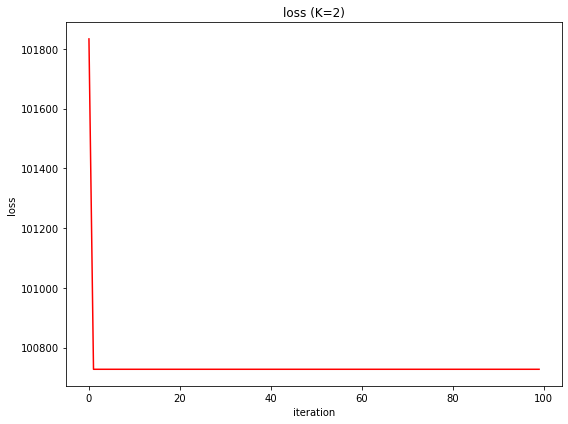

**************************************************
## [RESULT 06]
**************************************************


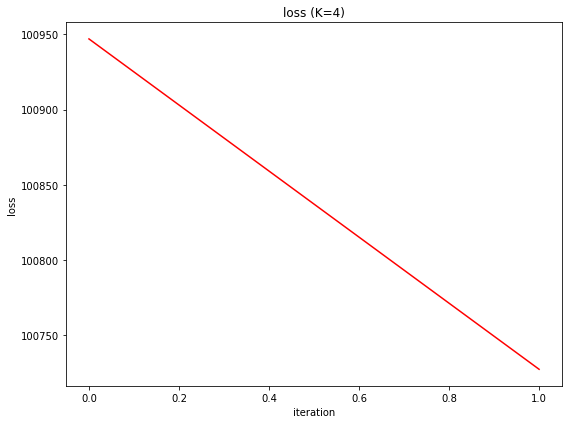

**************************************************
## [RESULT 07]
**************************************************


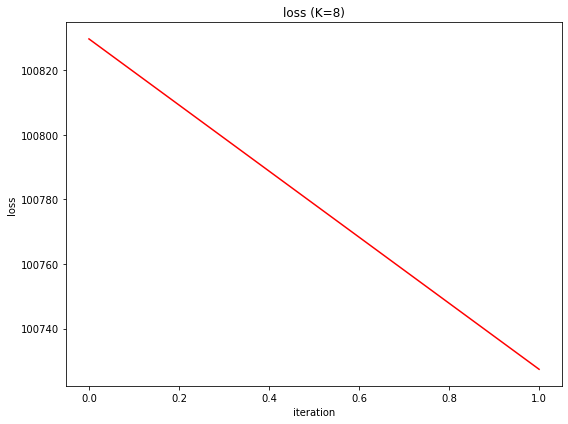

**************************************************
## [RESULT 08]
**************************************************


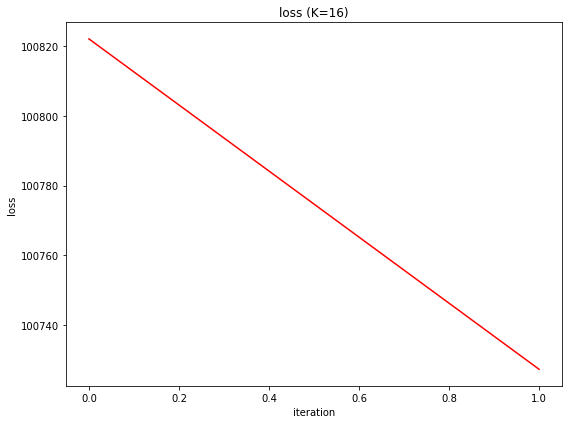

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


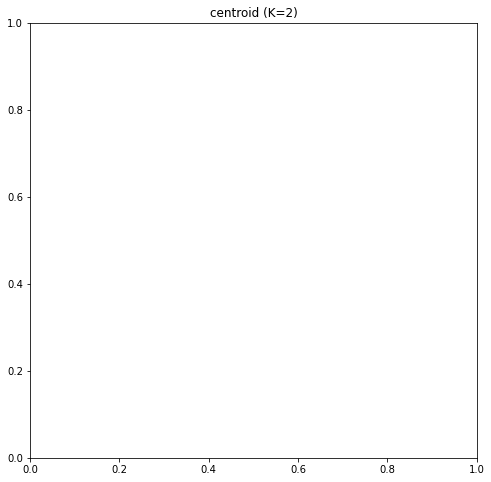

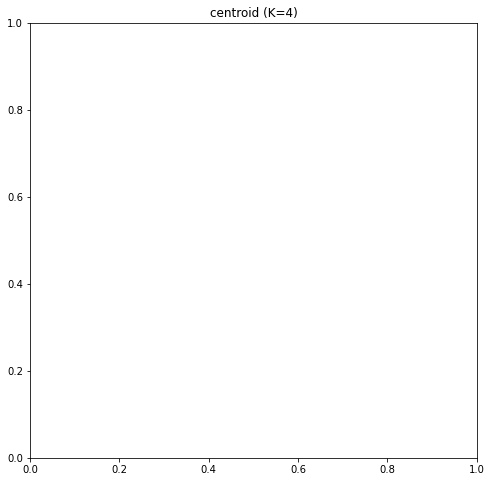

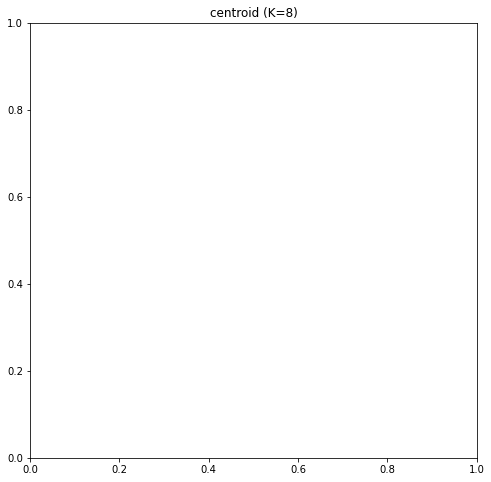

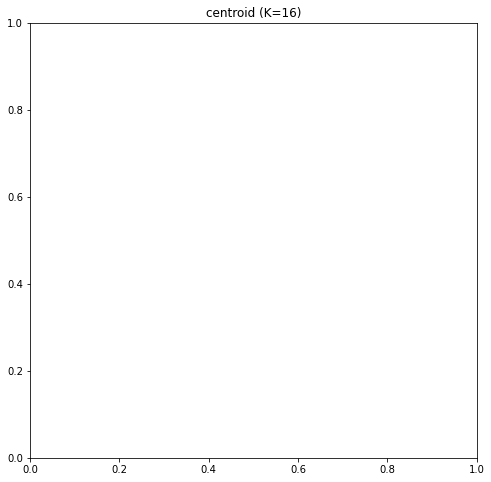

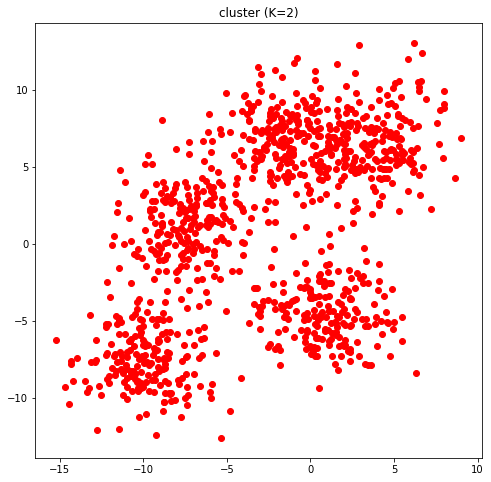

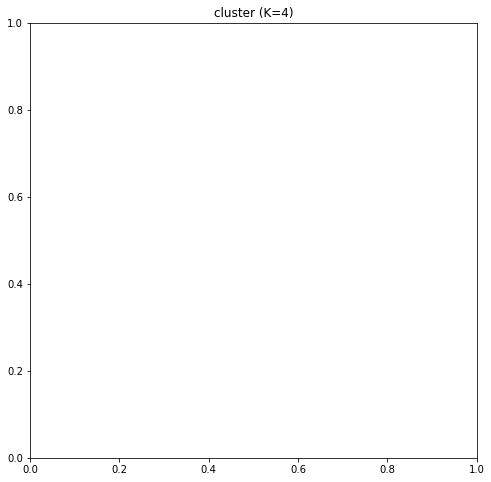

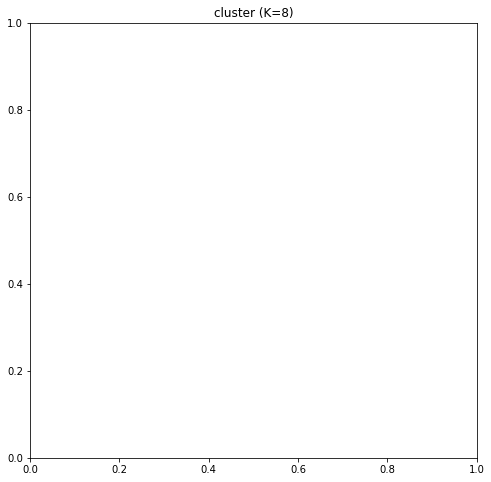

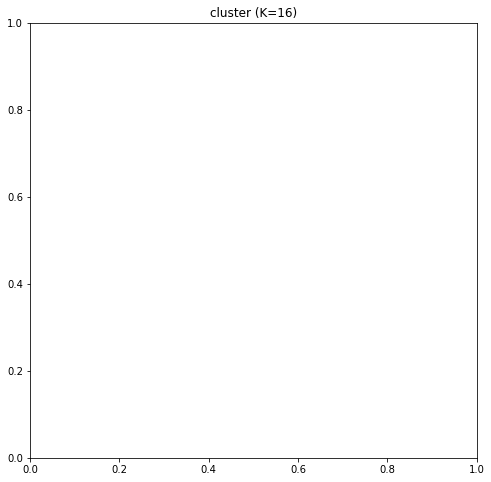

In [1307]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)